## Import Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Krishna\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Krishna\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Krishna\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
C:\Users\Krishna\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


## K-Means Image Segmentation Algorithm

Image segmentation is a convenient and effective method for detecting foreground objects in images with stationary background. Background subtraction is a commonly used class of techniques for segmenting objects of interest in a scene. This task has been widely studied in the literature. Specular reflections, background clutter, shading and shadows are the major factors that affect the efficiency of the system. Therefore, in order to reduce the scene complexity, it might be interesting to perform image segmentation focusing on the object‘s description only.

K-means clustering technique is used for the defect segmentation. Images are partitioned into four clusters in which one or more cluster contains only infected region of the fruit. K-means clustering algorithm was developed by J. MacQueen (1967) and later by J. A. Hartigan & M. A. Wong (179). The K-means clustering algorithms classify the objects (pixels in our problem) into K number of classes based on a set of features.

Following are the steps to be followed for this algorithm

1. Read input image
2. Transform image from RGB to L\*a\*b\* color space.
3. Classify colors using K-Means clustering in 'a\*b\*' space.
4. Label each pixel in the image from the results of K-Means.
5. Generate images that segment the image by color.
6. Select disease containing segment.

### Step 1: Read input image

We are experimenting for an apple fruit that is infected with apple scab disease

Text(0.5, 0, 'Grayscale')

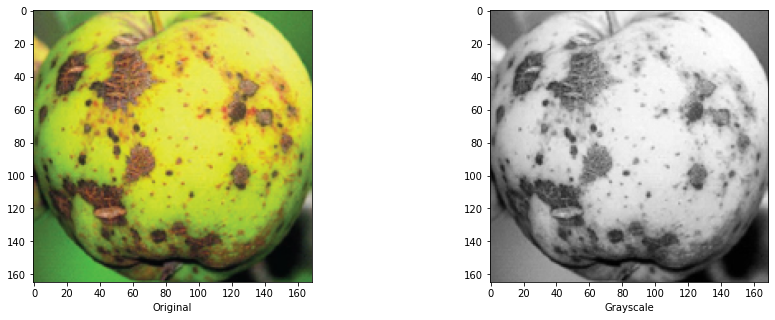

In [2]:
img = cv2.imread('Images/blotch7.PNG')

rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.imshow(rgb_img)
ax1.set_xlabel('Original')
ax2.imshow(gray_img, 'gray')
ax2.set_xlabel('Grayscale')

### Step 2: Transform image from RGB to L\*a\*b\* color space.

Text(0.5, 0, 'L*a*b* Image')

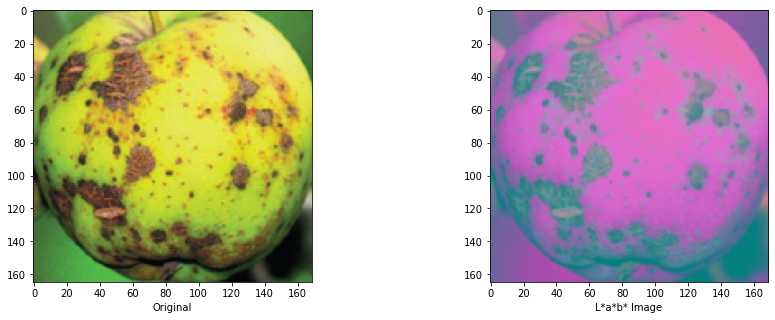

In [3]:
lab_img = cv2.cvtColor(rgb_img,cv2.COLOR_RGB2LAB)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.imshow(rgb_img)
ax1.set_xlabel('Original')
ax2.imshow(lab_img)
ax2.set_xlabel('L*a*b* Image')

### Steps 3, 4 and 5 altogether

Cluster Indexes : [85, 77, 93, 95]


Text(0.5, 0, 'Grayscale based on Cluster Index')

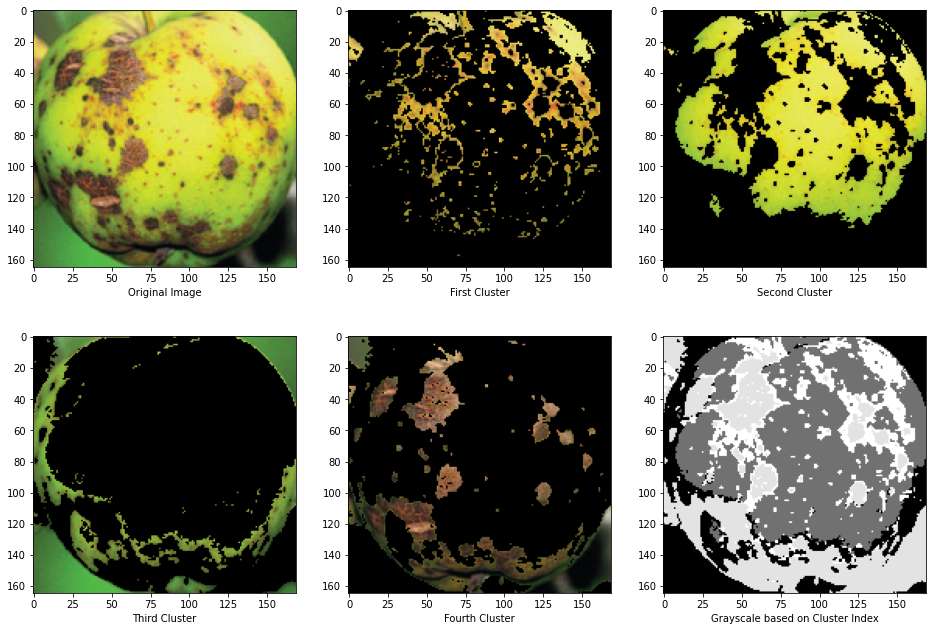

In [4]:
## Removing the "L" channel from the LAB color space
lab_img[:, :, 0] = 0

# convert to np.float32
Z = lab_img.reshape((-1,3))
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4

ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

#blur = cv2.medianBlur(res2, 7)

#edges = cv2.Canny(img,150,200)

gray_res = cv2.cvtColor(res2, cv2.COLOR_RGB2GRAY)

values = list(set(gray_res.flatten()))
print("Cluster Indexes :", values)

mask1 = np.where((gray_res == values[0]), 1, 0).astype('uint8')
mask2 = np.where((gray_res == values[1]), 1, 0).astype('uint8')
mask3 = np.where((gray_res == values[2]), 1, 0).astype('uint8')
mask4 = np.where((gray_res == values[3]), 1, 0).astype('uint8')

dis1 = cv2.bitwise_and(rgb_img, rgb_img, mask=mask1)
dis2 = cv2.bitwise_and(rgb_img, rgb_img, mask=mask2)
dis3 = cv2.bitwise_and(rgb_img, rgb_img, mask=mask3)
dis4 = cv2.bitwise_and(rgb_img, rgb_img, mask=mask4)

fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(16,11))

ax1.imshow(rgb_img)
ax1.set_xlabel('Original Image')
ax2.imshow(dis4)
ax2.set_xlabel('First Cluster')
ax3.imshow(dis1)
ax3.set_xlabel('Second Cluster')
ax4.imshow(dis2)
ax4.set_xlabel('Third Cluster')
ax5.imshow(dis3)
ax5.set_xlabel('Fourth Cluster')
ax6.imshow(gray_res, 'gray')
ax6.set_xlabel('Grayscale based on Cluster Index')

### Step 6: Select disease containing segment.

From above images, we can clearly identify that first and the fourth are the clusters with disease containing segments

## Complete algorithm code

Trying this algorithm on different images

[89, 107, 117, 94]


Text(0.5, 0, 'Grayscale based on Cluster Index')

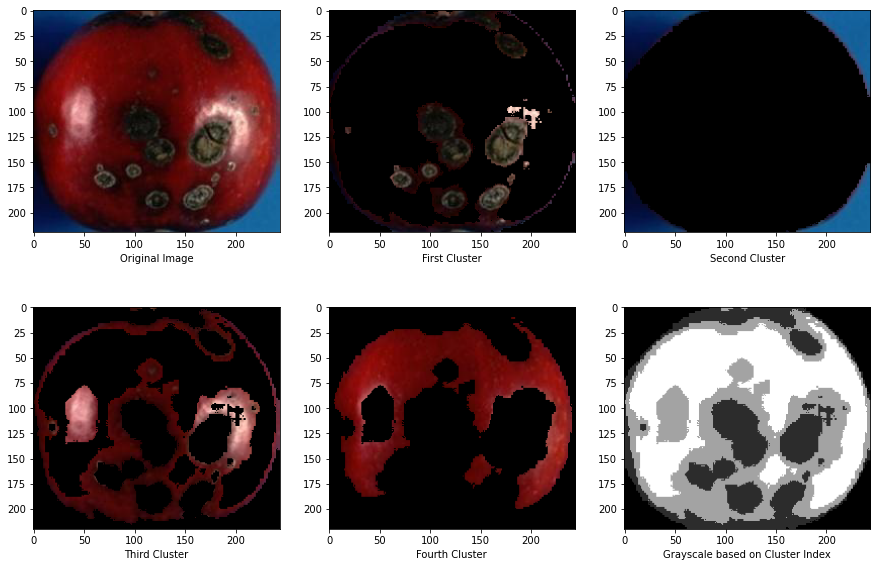

In [7]:
img = cv2.imread('Images/scab2.png')

rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

lab_img = cv2.cvtColor(rgb_img,cv2.COLOR_RGB2LAB)
lab_img[:, :, 0] = 0
#print(lab_img)

# convert to np.float32
Z = lab_img.reshape((-1,3))
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4

ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

#blur = cv2.medianBlur(res2, 7)

#edges = cv2.Canny(img,150,200)

gray_res = cv2.cvtColor(res2, cv2.COLOR_RGB2GRAY)

values = list(set(gray_res.flatten()))
print(values)

mask1 = np.where((gray_res == values[0]), 1, 0).astype('uint8')
mask2 = np.where((gray_res == values[1]), 1, 0).astype('uint8')
mask3 = np.where((gray_res == values[2]), 1, 0).astype('uint8')
mask4 = np.where((gray_res == values[3]), 1, 0).astype('uint8')

dis1 = cv2.bitwise_and(rgb_img, rgb_img, mask=mask1)
dis2 = cv2.bitwise_and(rgb_img, rgb_img, mask=mask2)
dis3 = cv2.bitwise_and(rgb_img, rgb_img, mask=mask3)
dis4 = cv2.bitwise_and(rgb_img, rgb_img, mask=mask4)

fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15,10))

ax1.imshow(rgb_img)
ax1.set_xlabel('Original Image')
ax2.imshow(dis4)
ax2.set_xlabel('First Cluster')
ax3.imshow(dis1)
ax3.set_xlabel('Second Cluster')
ax4.imshow(dis2)
ax4.set_xlabel('Third Cluster')
ax5.imshow(dis3)
ax5.set_xlabel('Fourth Cluster')
ax6.imshow(gray_res, 'gray')
ax6.set_xlabel('Grayscale based on Cluster Index')

Note :

For some cases you might need to vary the number of clusters, it usually depends on the disease type. For example, for an apple affected with a disease called "apple rot", you might need to change the number of clusters from 4 to 3

[94, 102, 95]


Text(0.5, 0, 'Grayscale based on Cluster Index')

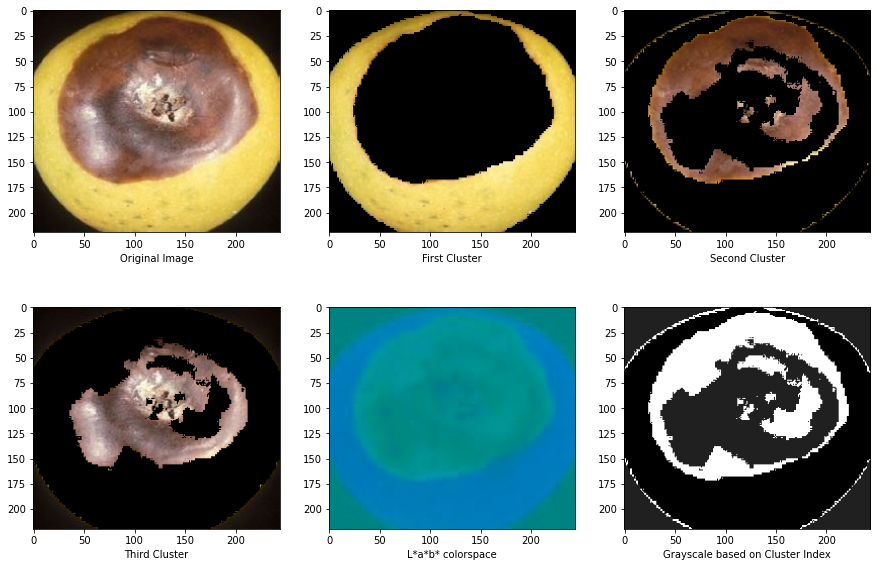

In [8]:
img = cv2.imread('Images/rot2.png')

rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

lab_img = cv2.cvtColor(rgb_img,cv2.COLOR_RGB2LAB)
lab_img[:, :, 0] = 0
#print(lab_img)

# convert to np.float32
Z = lab_img.reshape((-1,3))
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3

ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

#blur = cv2.medianBlur(res2, 7)

#edges = cv2.Canny(img,150,200)

gray_res = cv2.cvtColor(res2, cv2.COLOR_RGB2GRAY)

values = list(set(gray_res.flatten()))
print(values)

mask1 = np.where((gray_res == values[0]), 1, 0).astype('uint8')
mask2 = np.where((gray_res == values[1]), 1, 0).astype('uint8')
mask3 = np.where((gray_res == values[2]), 1, 0).astype('uint8')
#mask4 = np.where((gray_res == values[3]), 1, 0).astype('uint8')

dis1 = cv2.bitwise_and(rgb_img, rgb_img, mask=mask1)
dis2 = cv2.bitwise_and(rgb_img, rgb_img, mask=mask2)
dis3 = cv2.bitwise_and(rgb_img, rgb_img, mask=mask3)
#dis4 = cv2.bitwise_and(rgb_img, rgb_img, mask=mask4)

fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15,10))

ax1.imshow(rgb_img)
ax1.set_xlabel('Original Image')
ax2.imshow(dis1)
ax2.set_xlabel('First Cluster')
ax3.imshow(dis2)
ax3.set_xlabel('Second Cluster')
ax4.imshow(dis3)
ax4.set_xlabel('Third Cluster')
ax5.imshow(lab_img)
ax5.set_xlabel('L*a*b* colorspace')
ax6.imshow(gray_res, 'gray')
ax6.set_xlabel('Grayscale based on Cluster Index')

# Happy Experimenting!